# Choropleth map of Data Science topics in San Francisco

A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
1. Data Analysis / Statistics
1. Data Journalism
1. Data Visualization
1. Deep Learning
1. Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.  
The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.  
If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.  
Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:  

<img src = "Topic_Survey_Question.png" width="862" height="313">

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Once you have succeeded in creating the above dataframe, please upload a screenshot of your dataframe with the actual numbers. (5 marks)

In [1]:
import pandas as pd
df_survey = pd.read_csv("https://cocl.us/datascience_survey_data", index_col = 0)
df_survey

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

<img src ="Bar_Chart_Masked.png" width="948" hight="540">

To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
1. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
1. As for the chart:
    * use a figure size of (20, 8),
    * bar width of 0.8,
    * use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
    * use font size 14 for the bar labels, percentages, and legend,
    * use font size 16 for the title, and,
    * display the percentages above the bars as shown above, and remove the left, top, and right borders.

Once you are satisfied with your chart, please upload a screenshot of your plot. (5 marks)

In [2]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

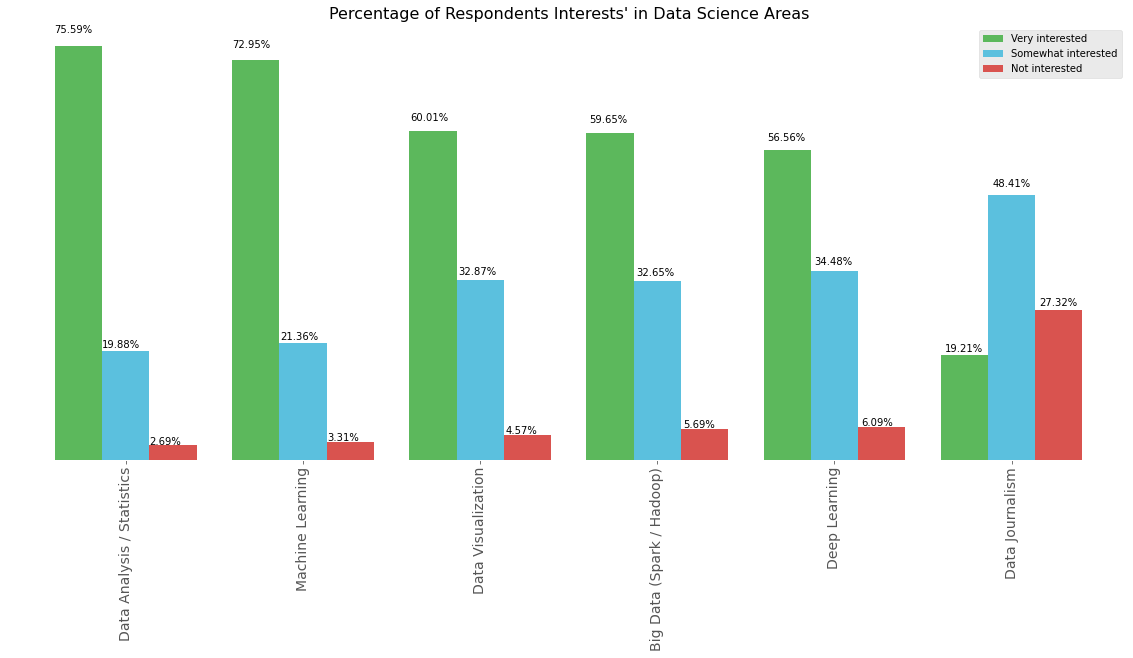

In [3]:
# 1. Sort the dataframe in descending order of Very interested.
df_survey.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

# 2. Convert the numbers into percentages of the total number of respondents.
#    Recall that 2,233 respondents completed the survey. 
#    Round percentages to 2 decimal places.
df_survey_pct = ((df_survey / 2233) * 100).round(2)

ax = df_survey_pct.plot(kind='bar',
                       figsize = (20, 8),
                       width = 0.8,
                       color = ['#5cb85c', '#5bc0de', '#d9534f'],
                       fontsize = 14)

plt.title('Percentage of Respondents Interests\''' in Data Science Areas', fontsize=16) # add title to the plot

# Solution inspired in https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color/23907866
ax.set_facecolor((1.0, 1.0, 1.0))

# Solution inspired in https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

# Solution inspired in https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

1. Central,
1. Southern,
1. Bayview,
1. Mission,
1. Park,
1. Richmond,
1. Ingleside,
1. Taraval,
1. Northern, and,
1. Tenderloin.

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

In [4]:
#df_sfcrime = pd.read_csv("https://cocl.us/sanfran_crime_dataset")
df_sfcrime = pd.read_csv("ChoroplethMapData/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [5]:
df_tmp = df_sfcrime.groupby(['PdDistrict']).count().reset_index()
df_tmp.drop(['Category','Descript','DayOfWeek','Date','Time', 'Resolution','Address','X','Y','Location','PdId'], axis=1, inplace=True)
df_tmp.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace=True)

In [6]:
df_tmp

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100
5         PARK   8699
6     RICHMOND   8922
7     SOUTHERN  28445
8      TARAVAL  11325
9   TENDERLOIN   9942

Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

1. it is centred around San Francisco,
1. you use a zoom level of 12,
1. you use fill_color = 'YlOrRd',
1. you define fill_opacity = 0.7,
1. you define line_opacity=0.2, and,
1. you define a legend and use the default threshold scale.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

In [7]:
#https://cocl.us/sanfran_geojson
#!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json    
#print('GeoJSON file downloaded!')

In [8]:
import folium

In [9]:
sf_geo = r'ChoroplethMapData/san-francisco.geojson' # geojson file

# create a plain San Francisco map
sf_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12) #, tiles='Mapbox Bright')
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_tmp,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crimes'
)

# display map
sf_map

c:\users\pichau\appdata\local\programs\python\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
